# **Mini Project: Electric Vehicle Sales**

## **Problem Statement**
Tesla's dominance in the electric vehicle (EV) market is a significant challenge for other manufacturers. The goal of this analysis is to provide car companies with actionable insights into sales trends for plug-in hybrid electric vehicles (PHEV) and battery electric vehicles (BEV) in Washington state. By identifying key competitors, popular models, and growth opportunities, stakeholders can make data-driven decisions to compete more effectively.

---

## **Objectives**
1. **Analyze Sales Trends**:
   - Compare sales trends of Tesla against the top competitors.
   - Evaluate sales trends across vehicle types (PHEV vs. BEV).

2. **Identify Key Competitors**:
   - Highlight the top 15 competitors in the EV market.
   - Compare their market share and year-over-year growth.

3. **Discover Market Insights**:
   - Identify the most successful models by range and affordability.
   - Evaluate the overall growth of EV adoption in Washington.

---

## **Dataset Description**
The dataset contains information on electric vehicles sold in Washington state and includes the following key columns:
- **Make**: The car manufacturer (e.g., Tesla, BMW, Nissan).
- **Model Year**: The year the vehicle was manufactured.
- **Electric Vehicle Type**: Either Plug-in Hybrid Electric Vehicle (PHEV) or Battery Electric Vehicle (BEV).
- **Electric Range**: The vehicle's range on a full charge, in miles.
- **Legislative District**: Geographic region of the sale.
- **Vehicle Location**: Location data for the vehicle's registration.

**Note**: The dataset is filtered to include only vehicles categorized as PHEV or BEV.

---

## **Stakeholders**
The stakeholders for this project include:
- **Car Companies**: Manufacturers looking to analyze and improve their market position in Washington.
- **Policy Makers**: State legislators aiming to support EV adoption through incentives and infrastructure.
- **Dealerships**: Businesses interested in stocking the most in-demand models to increase sales.

---

## **Methodology**
1. **Data Cleaning**:
   - Remove missing and irrelevant data.
   - Handle outliers in columns like `Electric Range`.

2. **Exploratory Data Analysis (EDA)**:
   - Visualize sales trends over the years.
   - Analyze market share by manufacturer and vehicle type.
   - Highlight the growth of EV adoption across legislative districts.

3. **Comparative Analysis**:
   - Compare Tesla’s dominance to the top 15 competitors.
   - Investigate key factors (e.g., range, type) influencing sales.

4. **Visualizations**:
   - Line plots to show sales trends by year for top manufacturers.
   - Bar charts to display market share by manufacturer.
   - Scatter plots to analyze the relationship between `Electric Range` and sales.

---


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
electric_vehicles = pd.read_csv('https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD')
electric_vehicles.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA5L,King,Seattle,WA,98133.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,46.0,249903111,POINT (-122.35029 47.71871),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,5UX43EU08R,King,Seattle,WA,98125.0,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,39,0,46.0,264762606,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
2,5UX43EU06R,King,Seattle,WA,98102.0,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,39,0,43.0,275506031,POINT (-122.32427 47.63433),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJ3E1EA1J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,117023581,POINT (-122.22901 47.72201),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,1G1RA6E43C,Thurston,Olympia,WA,98501.0,2012,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,35,0,35.0,158415498,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10


In [84]:
electric_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220225 entries, 0 to 220224
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         220225 non-null  object 
 1   County                                             220222 non-null  object 
 2   City                                               220222 non-null  object 
 3   State                                              220225 non-null  object 
 4   Postal Code                                        220222 non-null  float64
 5   Model Year                                         220225 non-null  int64  
 6   Make                                               220225 non-null  object 
 7   Model                                              220225 non-null  object 
 8   Electric Vehicle Type                              220225 non-null  object

In [86]:
missing_values = pd.concat([electric_vehicles.isnull().sum(), 100 * electric_vehicles.isnull().mean()], axis = 1)
missing_values.columns = ['count','%']
missing_values.sort_values(by = 'count', ascending = False)                          

,count,%
Legislative District,463,0.210240
Vehicle Location,9,0.004087
2020 Census Tract,3,0.001362
City,3,0.001362
Electric Utility,3,0.001362
Postal Code,3,0.001362
County,3,0.001362
Electric Range,0,0.000000
DOL Vehicle ID,0,0.000000
Base MSRP,0,0.000000


In [88]:
electric_vehicles = electric_vehicles.dropna()
missing_values = pd.concat([electric_vehicles.isnull().sum(), 100 * electric_vehicles.isnull().mean()], axis = 1)
missing_values.columns = ['count','%']
missing_values.sort_values(by = 'count', ascending = False)
                           

,count,%
VIN (1-10),0,0.0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0,0.0
Electric Utility,0,0.0
Vehicle Location,0,0.0
DOL Vehicle ID,0,0.0
Legislative District,0,0.0
Base MSRP,0,0.0
Electric Range,0,0.0
Electric Vehicle Type,0,0.0
County,0,0.0


In [90]:
electric_vehicles['Base MSRP'].value_counts().head()

Base MSRP
0        216477
69900      1324
31950       366
52900       220
32250       142
Name: count, dtype: int64

In [92]:
electric_vehicles.drop(columns = 'Base MSRP')

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA5L,King,Seattle,WA,98133.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,46.0,249903111,POINT (-122.35029 47.71871),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,5UX43EU08R,King,Seattle,WA,98125.0,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,39,46.0,264762606,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
2,5UX43EU06R,King,Seattle,WA,98102.0,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,39,43.0,275506031,POINT (-122.32427 47.63433),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJ3E1EA1J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,1.0,117023581,POINT (-122.22901 47.72201),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,1G1RA6E43C,Thurston,Olympia,WA,98501.0,2012,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,35,35.0,158415498,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220220,KNDC4DLC5N,Thurston,Olympia,WA,98501.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,22.0,202095862,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
220221,5YJ3E1EA5J,Snohomish,Bothell,WA,98012.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,1.0,288277657,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
220222,5YJ3E1EB0K,Snohomish,Bothell,WA,98012.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,44.0,478018719,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
220223,2C4RC1L72N,King,Redmond,WA,98053.0,2022,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,45.0,216607737,POINT (-122.03287 47.68555),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [94]:
electric_vehicles.shape

(219756, 17)

In [96]:
electric_vehicles['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    127084
Clean Alternative Fuel Vehicle Eligible                          70854
Not eligible due to low battery range                            21818
Name: count, dtype: int64

In [98]:
electric_vehicles.groupby('Make')['Electric Vehicle Type'].value_counts()

Make                  Electric Vehicle Type                 
ACURA                 Battery Electric Vehicle (BEV)             115
ALFA ROMEO            Plug-in Hybrid Electric Vehicle (PHEV)      89
AUDI                  Battery Electric Vehicle (BEV)            2358
                      Plug-in Hybrid Electric Vehicle (PHEV)    1740
AZURE DYNAMICS        Battery Electric Vehicle (BEV)               4
                                                                ... 
VINFAST               Battery Electric Vehicle (BEV)               2
VOLKSWAGEN            Battery Electric Vehicle (BEV)            5798
VOLVO                 Plug-in Hybrid Electric Vehicle (PHEV)    3630
                      Battery Electric Vehicle (BEV)            1760
WHEEGO ELECTRIC CARS  Plug-in Hybrid Electric Vehicle (PHEV)       3
Name: count, Length: 64, dtype: int64

In [100]:
duplicates = electric_vehicles[electric_vehicles.duplicated()]
if duplicates.empty:
    print("No duplicates found")
else :
    print("Duplicates found")
    print(duplicates)
    
electric_vehicles_unique = electric_vehicles.drop_duplicates()


No duplicates found


In [102]:
electric_vehicles.groupby('Make')[['Electric Range']].value_counts()

Make                  Electric Range
ACURA                 0                  115
ALFA ROMEO            33                  89
AUDI                  0                 1633
                      16                 561
                      23                 544
                                        ... 
VOLVO                 14                 109
                      22                 100
                      21                  29
                      38                   8
WHEEGO ELECTRIC CARS  100                  3
Name: count, Length: 223, dtype: int64

In [104]:
electric_vehicles = electric_vehicles[electric_vehicles['Electric Range'] != 0]

In [106]:
electric_vehicles["Electric Vehicle Type"].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            46797
Plug-in Hybrid Electric Vehicle (PHEV)    45875
Name: count, dtype: int64

---
## **Exploratory Data Analysis (EDA)**

### **Overview**
Before diving into the exploratory analysis, a quick data cleaning process was performed to ensure the dataset is ready for analysis. The cleaning steps included:
- Removing rows with missing or irrelevant values.
- Ensuring that the dataset only contains vehicles categorized as Plug-in Hybrid Electric Vehicles (PHEV) or Battery Electric Vehicles (BEV).
- Validating key columns such as `Make`, `Model Year`, and `Electric Range` to ensure consistency.

### **Findings from the Cleaning Process**
The cleaning process revealed that the dataset is well-structured and contains valuable information about:
- Vehicle manufacturers and their performance in the market.
- Trends in sales for electric vehicles over the years.
- Insights into the types of vehicles being sold and their features (e.g., range, type).

### **Goals for EDA**
1. **Understand the Dataset**:
   - Explore the distribution of sales across manufacturers.
   - Analyze the sales trends over the years.
   - Investigate the popularity of PHEVs versus BEVs.

2. **Identify Key Competitors**:
   - Compare Tesla's sales performance against other top manufacturers.
   - Highlight market share by vehicle type and electric range.

3. **Generate Visualizations**:
   - Create visualizations to highlight trends and patterns in the data.
   - Provide stakeholders with clear insights into the EV market.

### **Next Steps**
With the cleaning process complete, we can now move forward to explore the dataset in greater depth, focusing on trends, distributions, and comparisons across manufacturers and vehicle types.


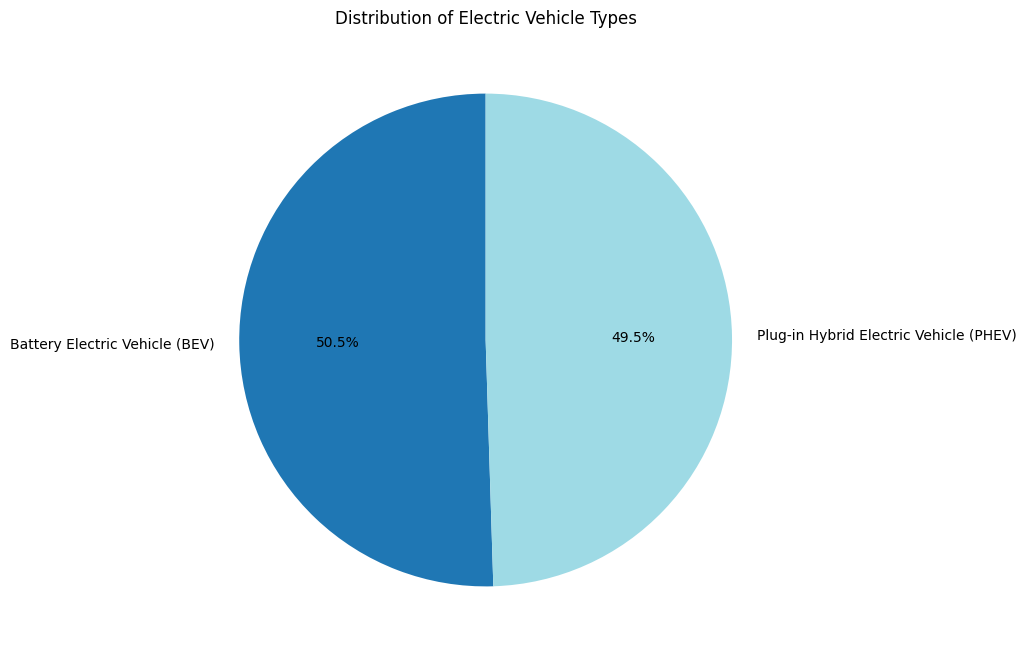

In [44]:

ev_type_counts = electric_vehicles['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(8, 8))  
ev_type_counts.plot.pie(
    autopct='%1.1f%%',   
    startangle=90,       
    cmap='tab20',        
    title='Distribution of Electric Vehicle Types'
)

plt.ylabel('')  
plt.show()


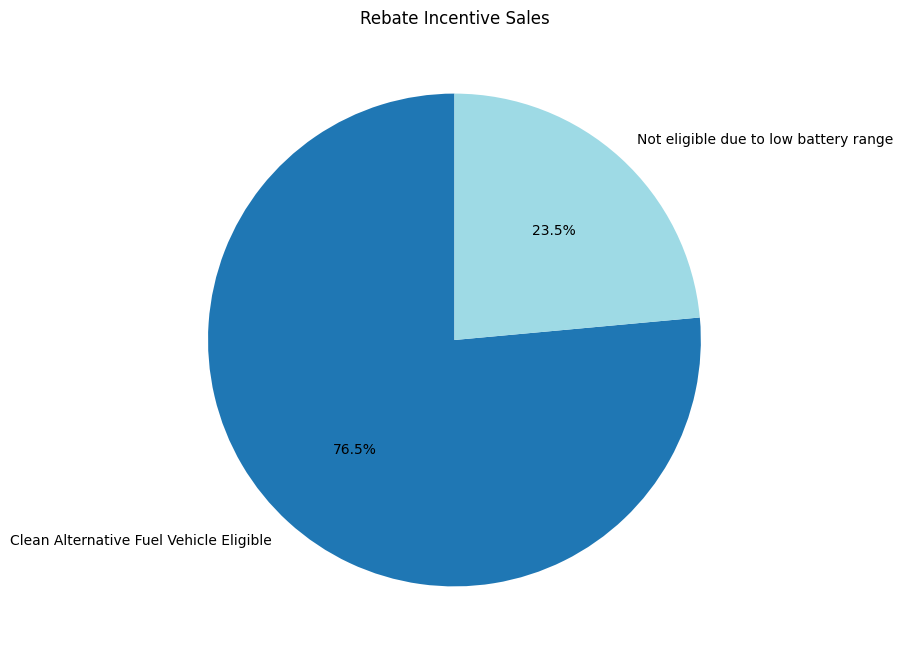

In [46]:
rebate_count = electric_vehicles['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
plt.figure(figsize=(8,8))
rebate_count.plot.pie(autopct='%1.1f%%',   
    startangle=90,       
    cmap='tab20',        
    title= "Rebate Incentive Sales")
plt.ylabel('')
plt.show()
                

### **Summary**
- The analysis of electric vehicle types and rebate incentives reveals a competitive balance between BEV and PHEV markets. 
- Additionally, the rebate eligibility data underlines the role of battery range as a key factor influencing both sales and consumer purchasing decisions.
- Manufacturers can leverage these insights to tailor their offerings to meet consumer demand while maximizing eligibility for government incentives.

## **Market Analysis of Electric Vehicle Competitors**

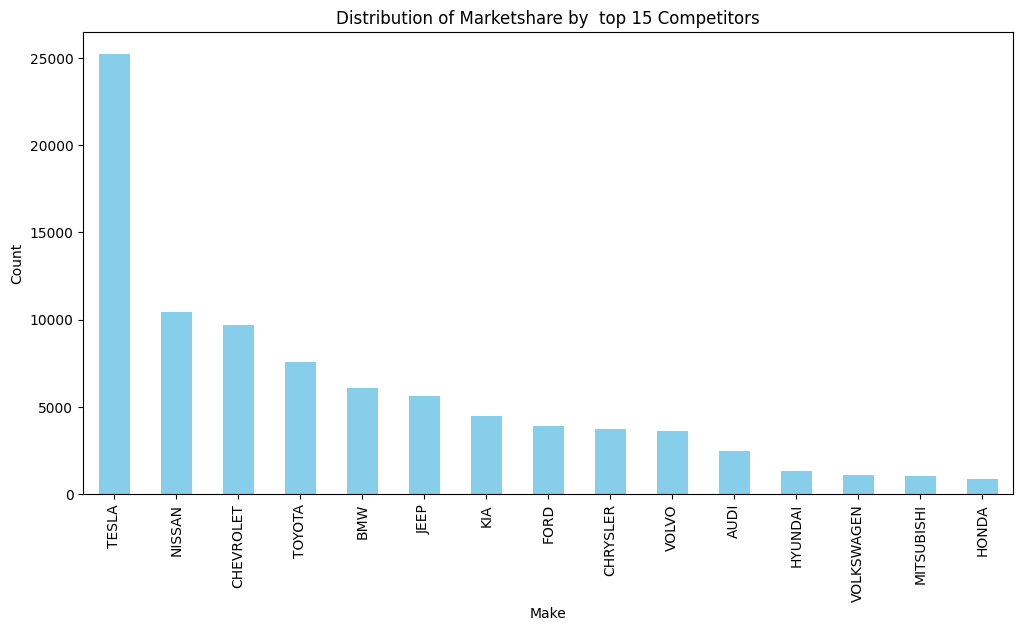

In [48]:
make_counts = electric_vehicles["Make"].value_counts().head(15)
plt.figure(figsize =(12,6))
make_counts.plot(kind ='bar', color = 'skyblue')
plt.title("Distribution of Marketshare by  top 15 Competitors")
plt.xlabel("Make")
plt.ylabel('Count')
plt.show()

### **1. Distribution of Market Share by Top 15 Competitors**
- The bar chart shows the market share distribution among the top 15 electric vehicle manufacturers.
- **Key Insights**:
  - Tesla dominates the market with over 25,000 vehicles sold, far outpacing its competitors.
  - Nissan and Chevrolet follow as the second and third largest competitors, each with sales exceeding 10,000 vehicles.
  - Other manufacturers, such as Toyota, BMW, and Jeep, contribute significantly but are far behind Tesla.

---

<Figure size 1200x800 with 0 Axes>

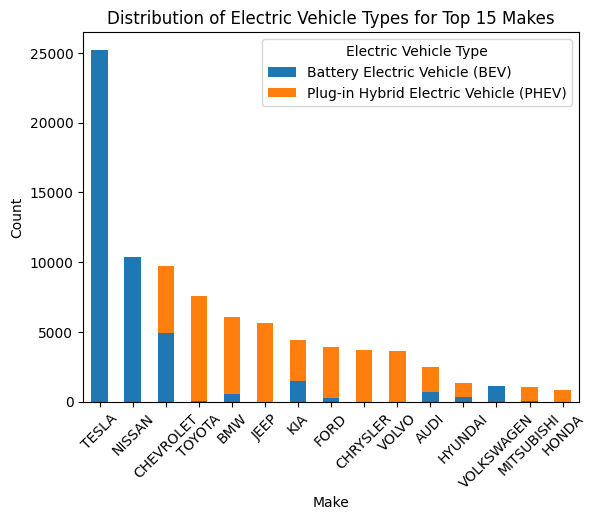

In [54]:
type_by_make = electric_vehicles.groupby(['Make', 'Electric Vehicle Type']).size().unstack(fill_value=0)
type_by_make['Total'] = type_by_make.sum(axis=1)
top_15_makes = type_by_make['Total'].nlargest(15).index
filtered_data = electric_vehicles[electric_vehicles['Make'].isin(top_15_makes)]
type_by_make_filtered = filtered_data.groupby(['Make', 'Electric Vehicle Type']).size().unstack(fill_value=0)
type_by_make_filtered_asc = type_by_make_filtered.loc[type_by_make_filtered.sum(axis=1).sort_values(ascending = False).index]

plt.figure(figsize=(12, 8))
type_by_make_filtered_asc.plot(kind='bar', stacked=True)
plt.title('Distribution of Electric Vehicle Types for Top 15 Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.legend(title='Electric Vehicle Type')
plt.xticks(rotation=45)
plt.show()

### **2. Distribution of Electric Vehicle Types for Top 15 Makes**
- This stacked bar chart breaks down the sales of Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV) for the top 15 manufacturers.
- **Key Insights**:
  - Tesla's sales are entirely composed of BEVs, reaffirming its strong position in the fully electric vehicle market.
  - Manufacturers like Chevrolet, Toyota, and BMW exhibit a balanced distribution between BEVs and PHEVs.
  - Brands such as Ford and Jeep primarily focus on PHEVs, while others like Nissan lean more toward BEVs.

---

### **Summary**
- Tesla remains the dominant player in the electric vehicle market, with its BEV-only strategy proving highly successful.
- The diversity of vehicle types (BEVs vs. PHEVs) among other competitors highlights a competitive and segmented market.
- Manufacturers seeking to challenge Tesla's dominance may benefit from emphasizing fully electric vehicles while maintaining a hybrid offering to cater to a broader customer base.

## **Hybrid Vehicle Market Analysis**

<Figure size 1200x800 with 0 Axes>

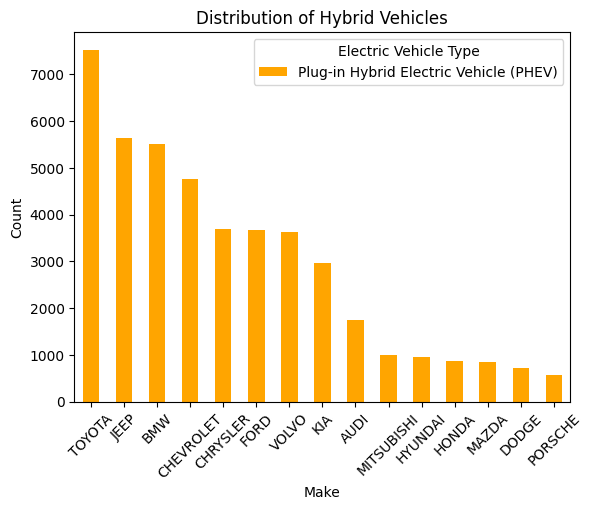

In [56]:
phev_data = electric_vehicles[electric_vehicles['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']
phev_by_make = phev_data.groupby(['Make','Electric Vehicle Type']).size().unstack(fill_value = 0)
phev_by_make['Total'] = phev_by_make.sum(axis=1)
top_15_phev = phev_by_make['Total'].nlargest(15).index
filtered_top_15 = phev_data[phev_data['Make'].isin(top_15_phev)]
filtered_phev = filtered_top_15.groupby(['Make','Electric Vehicle Type']).size().unstack(fill_value = 0)
filtered_phev_asc = filtered_phev.loc[filtered_phev.sum(axis =1).sort_values(ascending = False).index]

plt.figure(figsize=(12,8))
filtered_phev_asc.plot(kind = 'bar', stacked = True, color = 'orange')
plt.title("Distribution of Hybrid Vehicles")
plt.xlabel('Make')
plt.ylabel('Count')
plt.legend(title = 'Electric Vehicle Type')
plt.xticks(rotation = 45)
plt.show()

### **1. Distribution of Hybrid Vehicles**
- This bar chart shows the distribution of Plug-in Hybrid Electric Vehicles (PHEVs) among the top manufacturers.
- **Key Insights**:
  - Toyota leads the PHEV market with over 7,000 vehicles sold, making it the most dominant player in this category.
  - Jeep, BMW, and Chevrolet follow as significant competitors, each contributing over 5,000 vehicles to the market.
  - Other manufacturers like Chrysler, Ford, and Volvo also maintain a notable presence, while brands like Mazda and Porsche contribute smaller but impactful numbers.

---

### **2. Sales Trends for Top 15 Hybrid Vehicle Competitors**

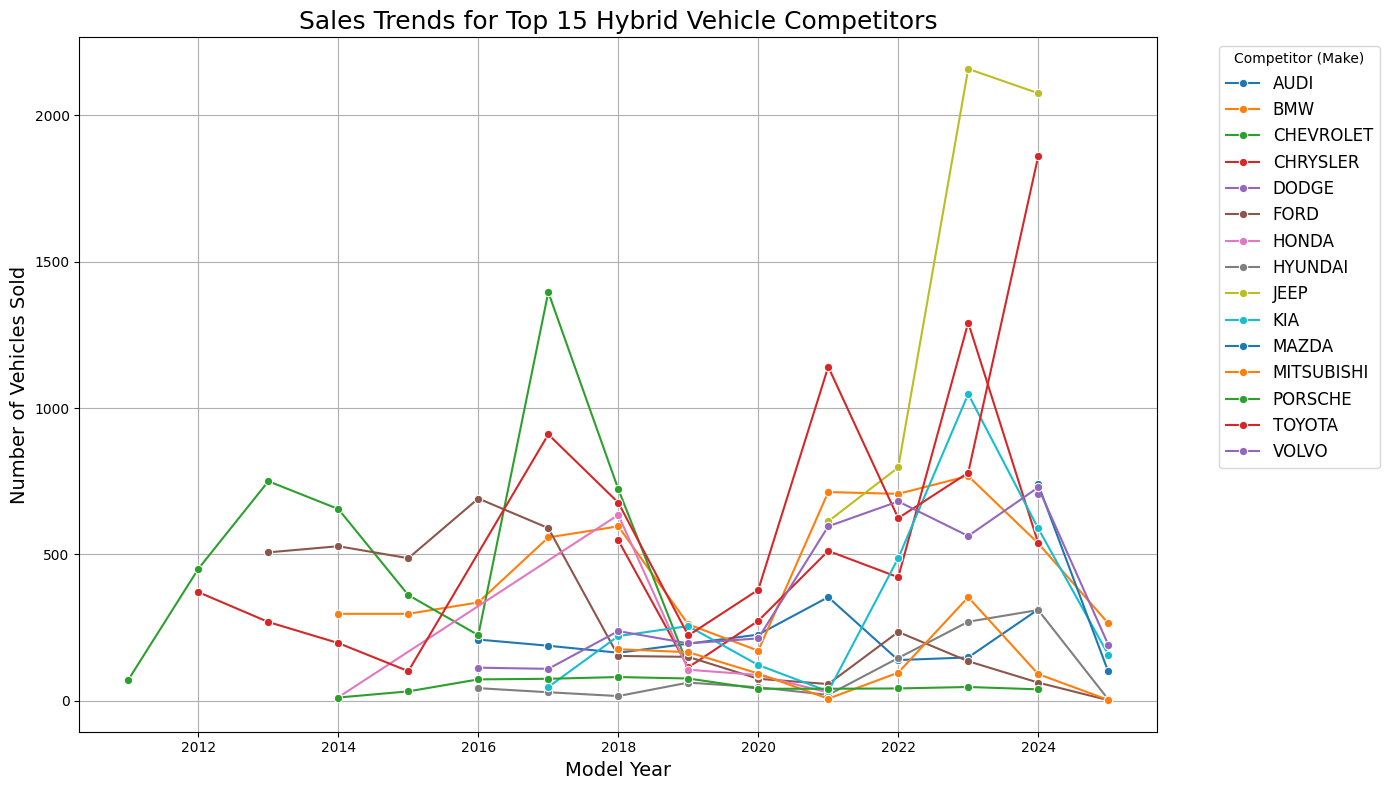

In [60]:
phev_data = electric_vehicles[electric_vehicles['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']
phev_by_make_year = phev_data.groupby(['Make', 'Model Year']).size().reset_index(name='Sales')
top_15_phev_makes = phev_by_make_year.groupby('Make')['Sales'].sum().nlargest(15).index
filtered_phev_data = phev_by_make_year[phev_by_make_year['Make'].isin(top_15_phev_makes)]

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=filtered_phev_data,
    x='Model Year',
    y='Sales',
    hue='Make',
    palette='tab10',  
    marker='o'        
)
plt.title('Sales Trends for Top 15 Hybrid Vehicle Competitors', fontsize=18)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Number of Vehicles Sold', fontsize=14)
plt.legend(
    title='Competitor (Make)',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=12
)
plt.grid(True)
plt.tight_layout()
plt.show()

- This line chart highlights sales trends for the top 15 PHEV manufacturers over the years.
- **Key Insights**:
  - Jeep and Toyota exhibit significant peaks in certain years, indicating periods of high sales activity.
  - Chevrolet, Ford, and BMW maintain relatively consistent sales patterns, reflecting steady market participation.
  - Some manufacturers, like Hyundai, Mazda, and Mitsubishi, show smaller, sporadic sales trends, indicating a niche presence in the market.
  - Recent years see increased variability among competitors, suggesting dynamic changes in the PHEV market.

---

### **Summary**
- Toyota has established itself as the leader in the PHEV market, with Jeep emerging as a strong competitor in specific years.
- Sales trends for PHEVs reveal diverse strategies and market behaviors among manufacturers, highlighting both steady players like Chevrolet and emerging ones like Jeep.
- Stakeholders can leverage these insights to focus on periods of growth and capitalize on changing market dynamics.

## **Battery Electric Vehicle (BEV) Market Insights**

<Figure size 1200x800 with 0 Axes>

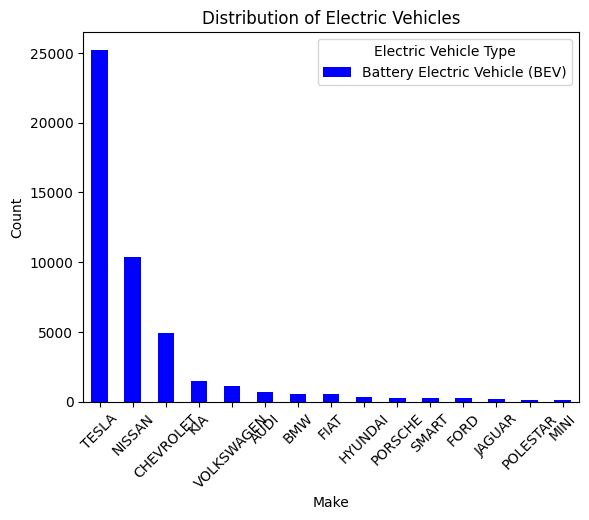

In [64]:
bev_data = electric_vehicles[electric_vehicles['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']
bev_by_make = bev_data.groupby(['Make','Electric Vehicle Type']).size().unstack(fill_value = 0)
bev_by_make['Total'] = bev_by_make.sum(axis=1)
top_15_bev = bev_by_make['Total'].nlargest(15).index
filtered_top_15 = bev_data[bev_data['Make'].isin(top_15_bev)]
filtered_bev = filtered_top_15.groupby(['Make','Electric Vehicle Type']).size().unstack(fill_value = 0)
filtered_bev_asc = filtered_bev.loc[filtered_bev.sum(axis =1).sort_values(ascending = False).index]

plt.figure(figsize=(12,8))
filtered_bev_asc.plot(kind = 'bar', stacked = True, color = 'blue')
plt.title("Distribution of Electric Vehicles")
plt.xlabel('Make')
plt.ylabel('Count')
plt.legend(title = 'Electric Vehicle Type')
plt.xticks(rotation = 45)
plt.show()

### **1. Distribution of Battery Electric Vehicles (BEVs)**
- The bar chart displays the distribution of BEV sales among the leading manufacturers.
- **Key Observations**:
  - Tesla overwhelmingly leads the BEV market, with sales surpassing 25,000 units, showcasing its dominance in the fully electric vehicle segment.
  - Nissan and Chevrolet emerge as distant competitors, each contributing significantly to the BEV market.
  - Other manufacturers, such as Kia, Volkswagen, and BMW, play smaller roles but still show presence in the segment.

---

/var/folders/0z/41_yxdy57v5gqbv0vhg6ky780000gn/T/ipykernel_93749/3180183439.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_bev_data = bev_by_make_year[phev_by_make_year['Make'].isin(top_15_phev_makes)]


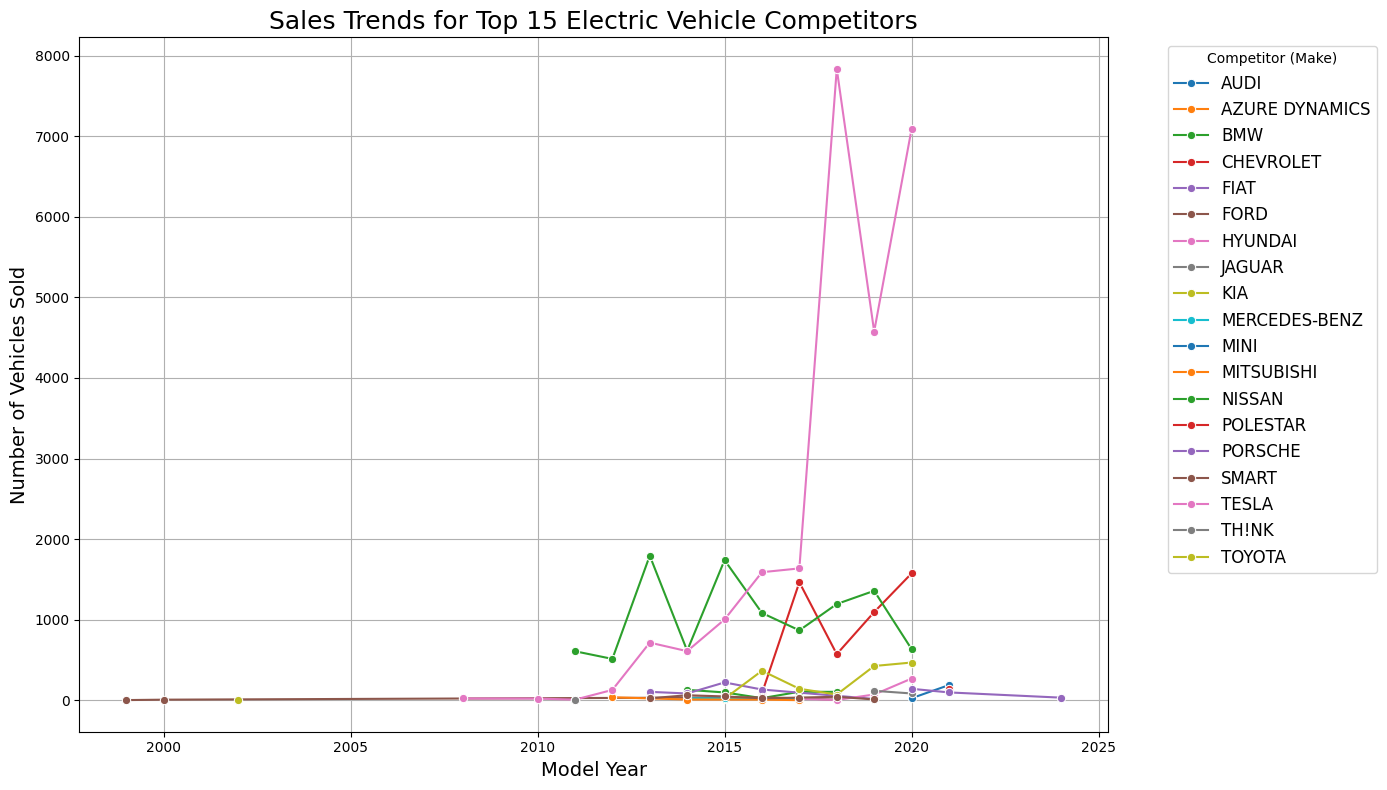

In [66]:
bev_data = electric_vehicles[electric_vehicles['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']
bev_by_make_year = bev_data.groupby(['Make', 'Model Year']).size().reset_index(name='Sales')
top_15_bev_makes = bev_by_make_year.groupby('Make')['Sales'].sum().nlargest(15).index
filtered_bev_data = bev_by_make_year[phev_by_make_year['Make'].isin(top_15_phev_makes)]

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=filtered_bev_data,
    x='Model Year',
    y='Sales',
    hue='Make',
    palette='tab10',  
    marker='o'        
)
plt.title('Sales Trends for Top 15 Electric Vehicle Competitors', fontsize=18)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Number of Vehicles Sold', fontsize=14)
plt.legend(
    title='Competitor (Make)',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=12
)
plt.grid(True)
plt.tight_layout()
plt.show()

### **2. Sales Trends for Top 15 BEV Competitors**
- This line chart depicts the sales trajectories of the top 15 BEV manufacturers over time.
- **Key Observations**:
  - Tesla maintains a strong upward trend, consistently outperforming all other competitors in most years.
  - Competitors like Nissan and Chevrolet demonstrate periodic increases in sales, reflecting their targeted efforts in specific years.
  - Smaller manufacturers like Porsche and Polestar show sporadic sales spikes, possibly tied to the release of new models or specific marketing campaigns.
  - The BEV market is dynamic, with manufacturers showing varied performance across different model years, indicating ongoing competition.

---

### **Conclusion**
- Tesla's clear dominance in the BEV segment highlights its success in capturing consumer demand for fully electric vehicles.
- While a few competitors such as Nissan and Chevrolet hold steady positions, others seem to be experimenting with market strategies or focusing on niche segments.
- Understanding the timing and drivers of sales peaks for smaller players could offer insights into opportunities for growth within this competitive landscape.

## **Analysis of Electric Range vs. Make**

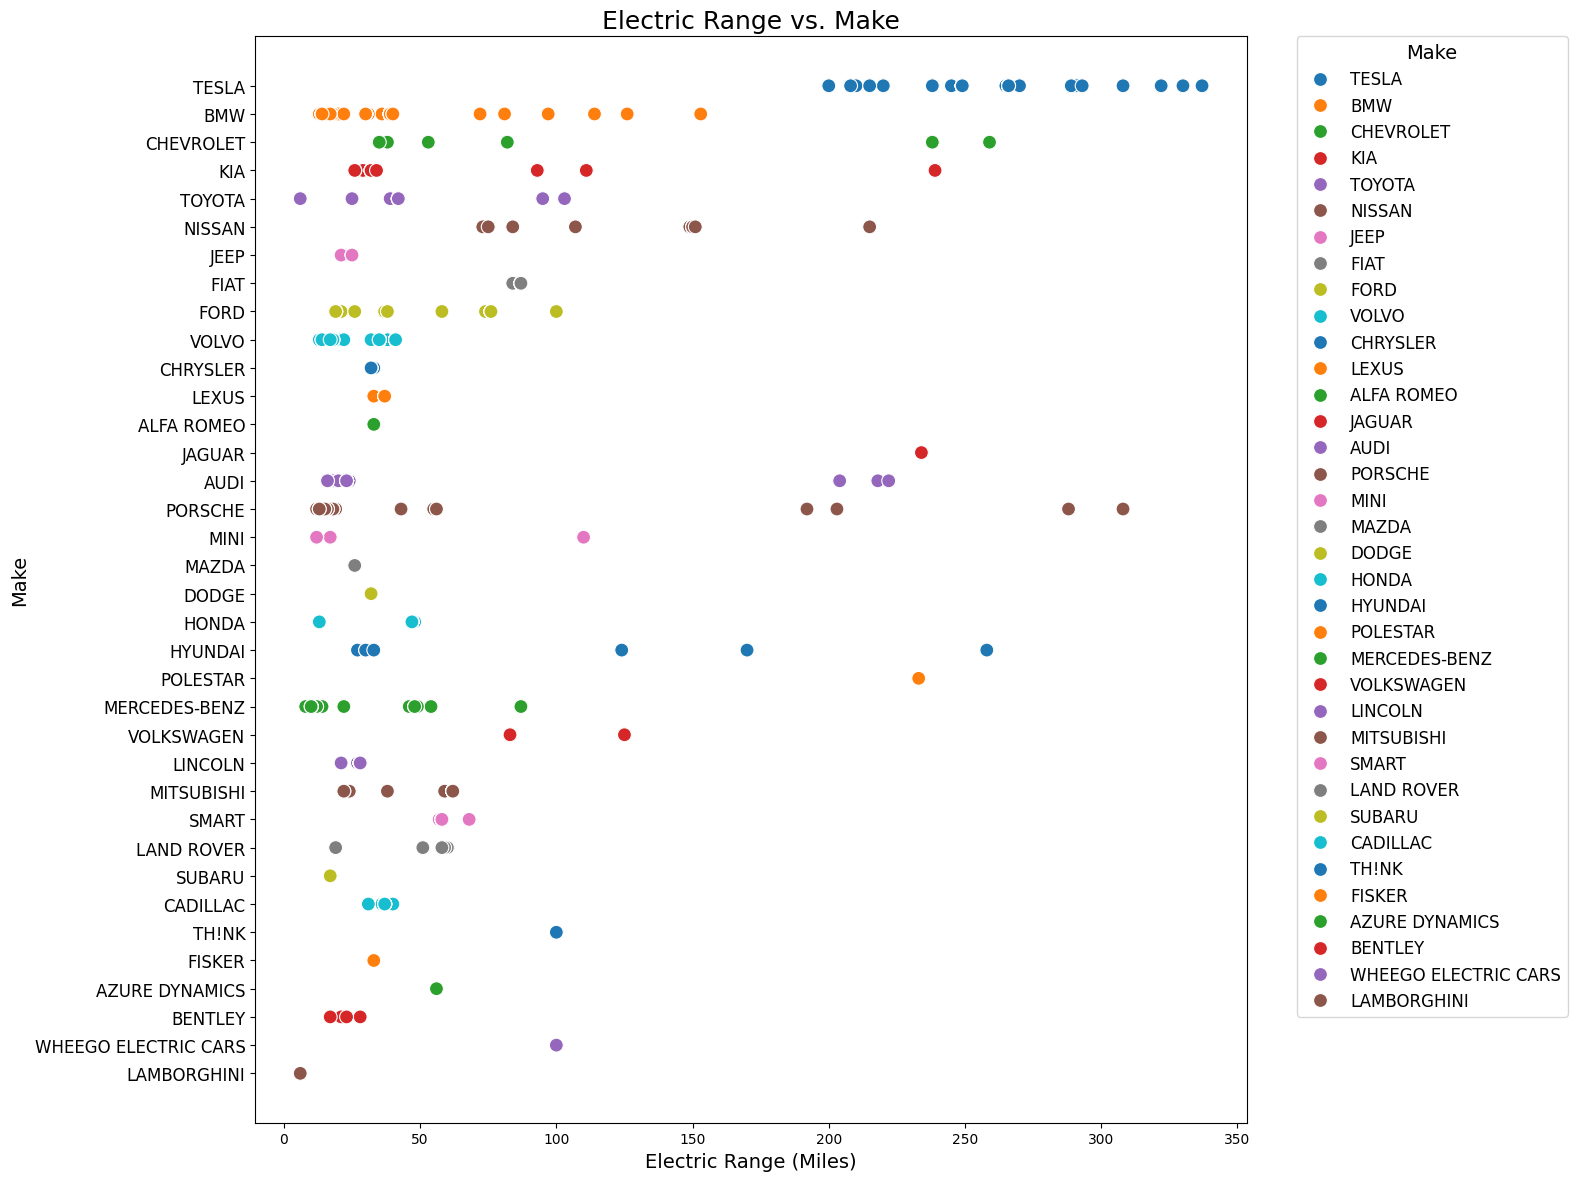

In [68]:
filtered_data = electric_vehicles[electric_vehicles['Electric Range'] > 0]
plt.figure(figsize=(16, 12)) 
sns.scatterplot(
    data=filtered_data,
    x='Electric Range',
    y='Make',
    hue='Make',
    palette='tab10',  
    legend='full',    
    s=100             
)
plt.title('Electric Range vs. Make', fontsize=18)
plt.xlabel('Electric Range (Miles)', fontsize=14)
plt.ylabel('Make', fontsize=14)
plt.yticks(fontsize=12, rotation=0) 
plt.legend(
    title='Make',
    loc='upper left',
    fontsize=12,
    title_fontsize=14,
    bbox_to_anchor=(1.05, 1),
    borderaxespad=0
)
plt.tight_layout()
plt.show()


### **Key Findings**
1. **Tesla’s Dominance and Long Battery Range**:
   - Tesla's electric vehicles exhibit some of the highest battery ranges, consistently exceeding 300 miles.
   - This aligns with Tesla’s market dominance observed in previous graphs, where it leads both the Battery Electric Vehicle (BEV) and overall EV markets.
   - **Insight**: Tesla's success can be strongly attributed to its ability to deliver long-range electric vehicles, appealing to consumer preferences for extended driving capability.

2. **Competitors with Medium-Range EVs**:
   - Manufacturers like BMW, Chevrolet, and Kia have vehicles with battery ranges between 100 and 250 miles, showing a solid presence in the mid-range market.
   - These brands also performed well in previous graphs, particularly in the BEV market (e.g., Chevrolet) and hybrid market (e.g., Kia).
   - **Observation**: While these brands lack ultra-long-range vehicles like Tesla, they maintain competitive market shares by offering reliable mid-range EVs.

3. **Manufacturers with Shorter Battery Ranges**:
   - Brands such as Fiat, Mini, and Hyundai predominantly offer vehicles with ranges below 100 miles.
   - These manufacturers were observed to have limited market shares in previous analyses, which could be linked to consumer hesitation around shorter battery ranges.
   - **Insight**: Short-range EVs may face challenges in competing with long-range models, particularly in regions where charging infrastructure is not yet comprehensive.

4. **Luxury and Niche Players**:
   - Premium brands like Porsche, Jaguar, and Mercedes-Benz have vehicles with ranges comparable to or slightly below Tesla's but do not exhibit comparable market shares.
   - This suggests that while battery range is important, other factors like price, brand reputation, or marketing also play significant roles in sales performance.

---

### **Comparison with Previous Graphs**
- The **distribution of BEVs** showed Tesla’s dominance in the BEV market, which is supported by this scatter plot highlighting Tesla's superior battery range.
- The **PHEV analysis** demonstrated manufacturers like Toyota and Jeep excelling in the hybrid market, a segment not directly competing with Tesla’s long-range BEVs.
- The **sales trends for competitors** illustrated periodic sales spikes for other brands, suggesting that some competitors may focus on niche launches or specific model years, but they fail to sustain consistent competition with Tesla.

---

### **Recommendations**
1. **Compete on Battery Range**:
   - Competitors aiming to challenge Tesla’s market dominance should prioritize developing EVs with battery ranges exceeding 300 miles.
   - Investment in battery technology and partnerships with charging infrastructure providers could help bridge the gap in range anxiety.

2. **Leverage the Mid-Range Market**:
   - Brands like Chevrolet and Kia should continue to capitalize on the mid-range market by offering reliable EVs at competitive price points, targeting consumers for whom cost is a bigger factor than maximum range.

3. **Expand Marketing for Premium Brands**:
   - Luxury manufacturers like Porsche and Jaguar should emphasize their premium features and highlight their vehicles’ performance to attract high-end customers who may prioritize brand reputation over range.

4. **Address Infrastructure Gaps**:
   - Manufacturers with short-range EVs (e.g., Fiat, Hyundai) could focus on regions with dense charging networks or provide incentives for home charging installations to mitigate range limitations.

5. **Broaden Incentive Eligibility**:
   - As seen in the rebate eligibility graph, ensuring vehicles meet range requirements for incentives could enhance their attractiveness to budget-conscious consumers.

---

### **Conclusion**
Tesla’s market dominance is largely driven by its focus on long battery range, which resonates with consumer demand for reliable, high-performance EVs. While competitors like Chevrolet and Kia are performing well in specific segments, bridging the range gap remains critical for sustained competition. By leveraging existing strengths and addressing battery and infrastructure challenges, competitors can better position themselves to gain market share in the evolving EV landscape.


## **Additional Dataset Ideas for Enhanced Insights**

To further enrich the analysis and gain deeper insights, the following data points could be incorporated:

### **1. Manufacturer Suggested Retail Price (MSRP)**
- Analyze the relationship between vehicle price and battery range.
- Identify market segments for premium vs. budget-friendly EVs.

---

### **2. New vs. Used Vehicle**
- Understand trends in the used EV market and how it impacts sales.
- Explore vehicle value retention over time.

---

### **3. Charging Infrastructure**
- Evaluate the impact of nearby charging stations on range preferences.
- Identify regions needing improved charging networks to support EV adoption.

---

### **4. Government Incentives**
- Measure the influence of rebates and tax credits on EV sales.
- Assess which incentives drive adoption of specific models or types (BEV vs. PHEV).

---

### **5. Customer Demographics**
- Profile buyers by age, income, and location to identify target audiences.
- Uncover regional preferences and trends in EV adoption.